In [2]:
"""
Feb 26, 2020

Experimenting on a machine mearning algorithm called Recurrent Neural Network 
to predict the stock closing price of a company.

"""

#IMPORTS 
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import os

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

from psequant import get_pse_data

In [6]:
# Input what stock you want to predict

# Ticker Symbol only for stock (ex: "JFC")
stock = "SMPH" 
# Date format ("yyyy-mm-dd")
begin_date = "2016-01-01"
end_date = "2020-01-01"

df = get_pse_data(stock, begin_date, end_date)
print(stock_table.head())

Stock table exists!
Reading stock_table.csv ...
             open   high    low  close        value
dt                                                 
2016-01-04  21.85  21.85  21.05  21.35  184891005.0
2016-01-05  21.30  21.85  20.90  21.55  170322150.0
2016-01-06  21.55  21.75  21.20  21.20  256173285.0
2016-01-07  21.60  21.60  20.50  20.50  266026950.0
2016-01-08  20.05  21.10  20.05  20.60  296123935.0


In [7]:
df = df['open'].values
df = df.reshape(-1, 1)
print(df.shape)
# To see the first five items
df[:5] 


(976, 1)


array([[21.85],
       [21.3 ],
       [21.55],
       [21.6 ],
       [20.05]])

In [8]:
# Split them into training and test sets

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(780, 1)
(246, 1)


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.14292498],
       [0.11680912],
       [0.12867996],
       [0.13105413],
       [0.05745489]])

In [10]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.76020893],
       [0.79107312],
       [0.81006648],
       [0.80769231],
       [0.8622982 ]])

In [11]:

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [12]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.14292498, 0.11680912, 0.12867996, 0.13105413, 0.05745489,
        0.07407407, 0.04273504, 0.04653371, 0.05508072, 0.0645774 ,
        0.02564103, 0.03608737, 0.0322887 , 0.00474834, 0.        ,
        0.02659069, 0.04083571, 0.06695157, 0.0954416 , 0.09781576,
        0.1025641 , 0.10493827, 0.10731244, 0.0954416 , 0.09306743,
        0.08831909, 0.07882241, 0.09781576, 0.1025641 , 0.11206078,
        0.12155745, 0.13105413, 0.11918329, 0.12155745, 0.10731244,
        0.0954416 , 0.09069326, 0.05982906, 0.07882241, 0.09781576,
        0.10968661, 0.11918329, 0.12630579, 0.10493827, 0.10731244,
        0.11206078, 0.12393162, 0.13580247, 0.11918329, 0.11443495]])

In [13]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.76020893, 0.79107312, 0.81006648, 0.80769231, 0.8622982 ,
        0.88603989, 0.93589744, 0.93352327, 0.9311491 , 0.94301994,
        0.9620133 , 0.94776828, 0.98100665, 0.98575499, 0.85992403,
        0.91690408, 0.97388414, 0.99050332, 0.95963913, 0.98812915,
        0.98812915, 0.98575499, 1.        , 0.98812915, 0.9620133 ,
        0.94776828, 0.96676163, 0.9382716 , 0.94301994, 0.94064577,
        0.95726496, 0.96438746, 0.95726496, 0.95014245, 0.95726496,
        0.95014245, 0.92640076, 0.92165242, 0.95489079, 0.91690408,
        0.98100665, 0.95726496, 0.95726496, 0.91215575, 0.9002849 ,
        0.93352327, 0.88366572, 0.9382716 , 0.93589744, 0.92402659]])

In [14]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [16]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [17]:

if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

Epoch 1/50
730/730 [==============================] - 5s 7ms/step - loss: 0.0765
Epoch 2/50
730/730 [==============================] - 2s 3ms/step - loss: 0.0155
Epoch 3/50
730/730 [==============================] - 2s 3ms/step - loss: 0.0090
Epoch 4/50
730/730 [==============================] - 2s 3ms/step - loss: 0.0074
Epoch 5/50
730/730 [==============================] - 2s 3ms/step - loss: 0.0079
Epoch 6/50
730/730 [==============================] - 2s 3ms/step - loss: 0.0075
Epoch 7/50
730/730 [==============================] - 2s 3ms/step - loss: 0.0075
Epoch 8/50
730/730 [==============================] - 3s 3ms/step - loss: 0.0070
Epoch 9/50
730/730 [==============================] - 2s 3ms/step - loss: 0.0066
Epoch 10/50
730/730 [==============================] - 2s 3ms/step - loss: 0.0064
Epoch 11/50
730/730 [==============================] - 2s 3ms/step - loss: 0.0057
Epoch 12/50
730/730 [==============================] - 2s 3ms/step - loss: 0.0061
Epoch 13/50
730/730 [====

In [18]:
model = load_model('stock_prediction.h5')

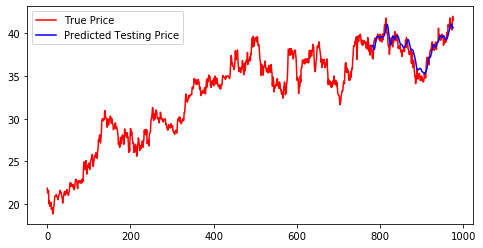

In [19]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

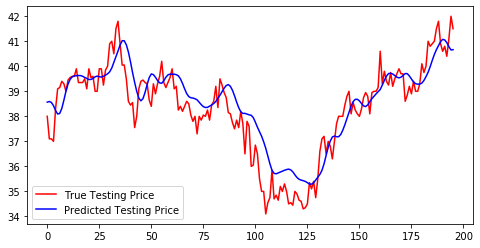

In [20]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [21]:
x = x_test[-1]
num_timesteps = 100
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[40.664295, 63.664593, 80.87528, 86.21169, 87.76626, 88.12112, 88.11283, 88.00668, 87.88893, 87.78465, 87.69857, 87.62905, 87.5731, 87.5279, 87.49108, 87.4609, 87.43597, 87.41521, 87.39788, 87.38331, 87.37096, 87.3605, 87.35163, 87.344025, 87.337524, 87.33192, 87.32708, 87.32293, 87.31929, 87.316124, 87.3134, 87.31104, 87.30899, 87.30721, 87.30567, 87.30428, 87.30306, 87.30191, 87.30078, 87.29964, 87.29853, 87.297455, 87.29662, 87.29614, 87.29625, 87.29682, 87.29771, 87.29844, 87.29827, 87.29635, 87.29139, 87.284966, 87.28405, 87.28396, 87.28396, 87.28398, 87.28399, 87.28402, 87.28402, 87.28402, 87.28405, 87.28407, 87.28409, 87.284096, 87.28411, 87.284096, 87.28409, 87.284096, 87.28409, 87.28409, 87.284096, 87.28411, 87.28412, 87.28412, 87.28411, 87.28412, 87.28412, 87.28412, 87.28413, 87.28412, 87.28412, 87.28413, 87.28412, 87.28412, 87.28413, 87.28412, 87.28413, 87.28412, 87.28412, 87.28412, 87.28412, 87.28412, 87.28412, 87.28412, 87.28412, 87.28412, 87.28413, 87.28412, 87.28412, 87.